# Statistics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read updated dataset

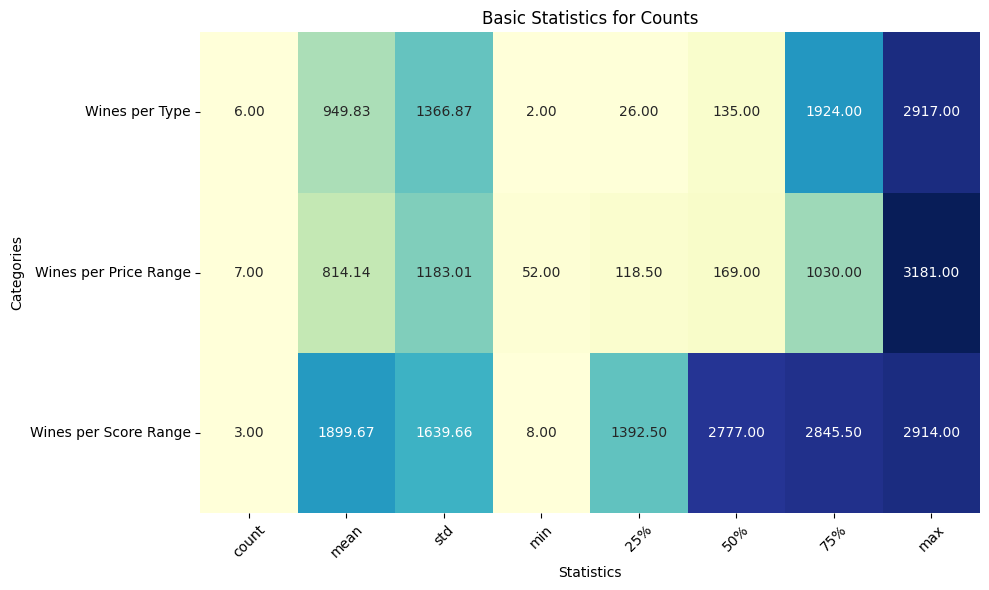

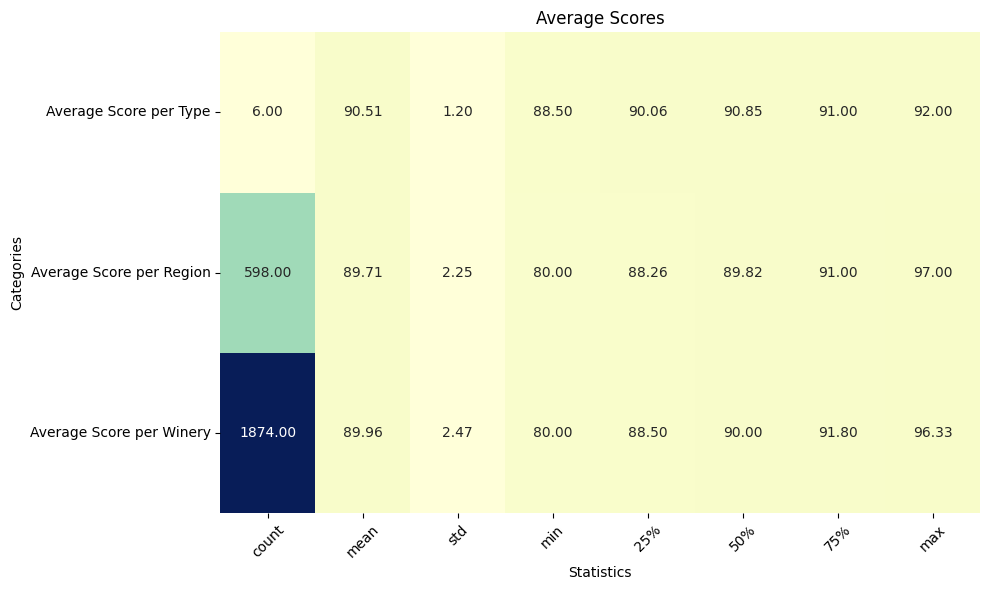

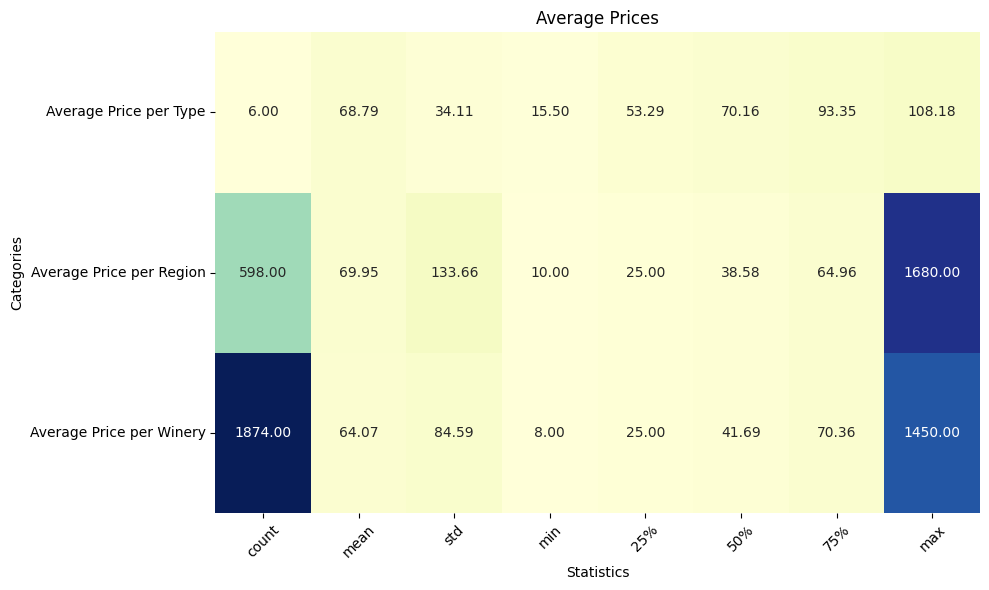

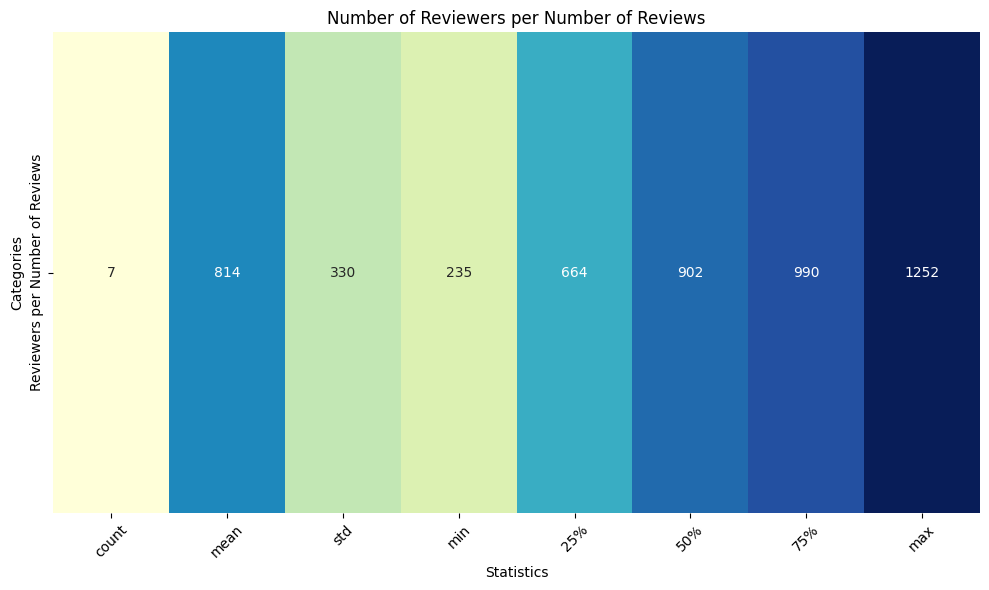


1. Number of wines per type:
type_and_color
Red Dessert          22
Red Sparkling         2
Red Still          2917
White Dessert        38
White Sparkling     232
White Still        2488
Name: name, dtype: int64

1. Number of wines per region:
region
American                                            4
Argentina                                           1
Argentina / Mendoza                                59
Argentina / Mendoza / Agrelo                        4
Argentina / Mendoza / Canota Valley                 2
                                                   ..
United States / Washington / Royal Slope            4
United States / Washington / Snipes Mountain        1
United States / Washington / Walla Walla Valley    27
United States / Washington / Yakima Valley          9
Uruguay                                             2
Name: name, Length: 598, dtype: int64

1. Number of wines per winery:
winery
001 Vintners           1
19 Crimes              1
32 Winds               2
A

<Figure size 640x480 with 0 Axes>

In [6]:
dataset = pd.read_csv("../src/updated_dataset.csv")

def bar_graph(ds, title, xlabel, ylabel, sort, sortType=False):
    
    if sort:
        ds_top20 = ds.sort_values(ascending=sortType).head(20)
    else:
        ds_top20 = ds.head(20)

    # Create the bar graph
    graph = ds_top20.plot(kind='bar')

    # Add number to the top of the bar
    bars = graph.patches
    for bar, num in zip(bars, ds_top20):
        graph.text(bar.get_x() + bar.get_width()/2, bar.get_height()+1, round(num), ha='center')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig('../stats/' + title.replace(' ', '_')  + '.png', bbox_inches='tight')
    plt.clf()
    print('Saved ' + title)

# 1. Number of wines per type/region/winery
wine_count_by_type = dataset.groupby('type_and_color')['name'].count()
wine_count_by_region = dataset.groupby('region')['name'].count()
wine_count_by_winery = dataset.groupby('winery')['name'].count()
price_ranges = [0, 50, 100, 150, 200, 250, 300, float('inf')]
dataset['price_range'] = pd.cut(dataset['price'].str.replace('$', '').str.replace(',', '').astype(float), bins=price_ranges)
# Adjust groupby operation to suppress the FutureWarning
wines_per_price_range = dataset.groupby('price_range', observed=True)['name'].count()
score_ranges = [0, 50, 60, 70, 80, 90, 100]
dataset['score_range'] = pd.cut(dataset['score'], bins=score_ranges)
# Adjust groupby operation to suppress the FutureWarning
wines_per_score_range = dataset.groupby('score_range', observed=True)['name'].count()


# Generate basic statistics for counts
wine_count_stats = {
    'Wines per Type': wine_count_by_type.describe(),
    #'Wines per Region': wine_count_by_region.describe(),
    #'Wines per Winery': wine_count_by_winery.describe(),
    'Wines per Price Range': wines_per_price_range.describe(),
    'Wines per Score Range': wines_per_score_range.describe()
}

# Create a single DataFrame for visualization
concatenated_stats = pd.concat(wine_count_stats.values(), axis=1)
concatenated_stats.columns = wine_count_stats.keys()

# Plotting the table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(concatenated_stats.T, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False)
plt.title('Basic Statistics for Counts')
plt.xlabel('Statistics')
plt.ylabel('Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Average score per type/region/winery
avg_score_per_type = dataset.groupby('type_and_color')['score'].mean()
avg_score_per_region = dataset.groupby('region')['score'].mean()
avg_score_per_winery = dataset.groupby('winery')['score'].mean()

# Create DataFrames for average scores
avg_score_data = {
    'Average Score per Type': avg_score_per_type.describe(),
    'Average Score per Region': avg_score_per_region.describe(),
    'Average Score per Winery': avg_score_per_winery.describe()
}

# Convert to DataFrame
avg_score_df = pd.DataFrame(avg_score_data)

# Plotting the table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_score_df.T, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False)
plt.title('Average Scores')
plt.xlabel('Statistics')
plt.ylabel('Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Average price per type/region/winery
dataset['price'] = dataset['price'].str.replace('$', '').str.replace(',', '').astype(float)
avg_price_per_type = dataset.groupby('type_and_color')['price'].mean()
avg_price_per_region = dataset.groupby('region')['price'].mean()
avg_price_per_winery = dataset.groupby('winery')['price'].mean()

# Create DataFrames for average prices
avg_price_data = {
    'Average Price per Type': avg_price_per_type.describe(),
    'Average Price per Region': avg_price_per_region.describe(),
    'Average Price per Winery': avg_price_per_winery.describe()
}

# Convert to DataFrame
avg_price_df = pd.DataFrame(avg_price_data)

# Plotting the table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_df.T, annot=True, fmt=".2f", cmap='YlGnBu', cbar=False)
plt.title('Average Prices')
plt.xlabel('Statistics')
plt.ylabel('Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Number of reviewers per number of reviews
reviewers_per_number_of_reviews = dataset.groupby('reviewer')['reviewer_info'].count()

# Create DataFrame for reviewers per number of reviews
reviewers_data = {
    'Reviewers per Number of Reviews': reviewers_per_number_of_reviews.describe()
}

# Convert to DataFrame
reviewers_df = pd.DataFrame(reviewers_data)

# Plotting the table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(reviewers_df.T, annot=True, fmt=".0f", cmap='YlGnBu', cbar=False)
plt.title('Number of Reviewers per Number of Reviews')
plt.xlabel('Statistics')
plt.ylabel('Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print("\n1. Number of wines per type:")
print(wine_count_by_type)
print("\n1. Number of wines per region:")
print(wine_count_by_region)
print("\n1. Number of wines per winery:")
print(wine_count_by_winery)
print("\n1. Number of wines per price range:")
print(wines_per_price_range)
print("\n1. Number of wines per score range:")
print(wines_per_score_range)

print("2. Average score per type:")
print(avg_score_per_type)
print("\n2. Average score per region:")
print(avg_score_per_region)
print("\n2. Average score per winery:")
print(avg_score_per_winery)

print("\n3. Average price per type:")
print(avg_price_per_type)
print("\n3. Average price per region:")
print(avg_price_per_region)
print("\n3. Average price per winery:")
print(avg_price_per_winery)

print("\n4. Reviewers per number of reviews:")
print(reviewers_per_number_of_reviews)

# Plot the results
bar_graph(wine_count_by_type, 'Number of wines per type', 'Type', 'Number', False)
bar_graph(wine_count_by_region, 'Number of wines per region', 'Region', 'Number', True)
bar_graph(wine_count_by_winery, 'Number of wines per winery', 'Winery', 'Number', True)
bar_graph(wines_per_price_range, 'Number of wines per price range', 'Price', 'Number', False)
bar_graph(wines_per_score_range, 'Number of wines per score', 'Score', 'Number', False)

bar_graph(avg_score_per_type, 'Average score per type', 'Type', 'Score', False)
bar_graph(avg_score_per_region, 'Average score per region', 'Region', 'Score', True)
bar_graph(avg_score_per_winery, 'Average score per winery', 'Winery', 'Score', True)

bar_graph(avg_price_per_type, 'Average price per type', 'Type', 'Price', False)
bar_graph(avg_price_per_region, 'Average price per region', 'Region', 'Price', True)
bar_graph(avg_price_per_winery, 'Average price per winery', 'Winery', 'Price', True)

bar_graph(reviewers_per_number_of_reviews, 'Number of reviews per reviewer', 'Reviewers', 'Number of reviews', False)


# New stats

# 1. Top 10 best rated wines
top_10_best_rated = dataset[['name', 'score']].sort_values(by='score', ascending=False).head(10)
plt.bar(top_10_best_rated['name'], top_10_best_rated['score'])
plt.title('Top 10 Best Wines')
plt.xlabel('Wine Name')
plt.ylabel('Wine Rating')
plt.xticks(rotation=90, ha='right')
plt.savefig('../stats/' + 'Top 10 Best Wines'  + '.png', bbox_inches='tight')
plt.clf()

# 2. Top 10 worst rated wines
top_10_worst_rated = dataset[['name', 'score']].sort_values(by='score', ascending=True).head(10)
plt.bar(top_10_worst_rated['name'], top_10_worst_rated['score'])
plt.title('Top 10 Worst Wines')
plt.xlabel('Wine Name')
plt.ylabel('Wine Rating')
plt.xticks(rotation=90, ha='right')
plt.savefig('../stats/' + 'Top 10 Worst Wines'  + '.png', bbox_inches='tight')
plt.clf()

# 3. Top 10 most expensive wines
top_10_most_expensive = dataset[['name', 'price']].sort_values(by='price', ascending=False).head(10)
plt.bar(top_10_most_expensive['name'], top_10_most_expensive['price'])
plt.title('Top 10 Most Expensive Wines')
plt.xlabel('Wine Name')
plt.ylabel('Wine Price')
plt.xticks(rotation=90, ha='right')
plt.savefig('../stats/' + 'Top 10 Most Expensive Wines'  + '.png', bbox_inches='tight')
plt.clf()

# 4. Top 10 cheapest wines
top_10_cheapest = dataset[['name', 'price']].sort_values(by='price', ascending=True).head(10)
plt.bar(top_10_cheapest['name'], top_10_cheapest['price'])
plt.title('Top 10 Cheapest Wines')
plt.xlabel('Wine Name')
plt.ylabel('Wine Price')
plt.xticks(rotation=90, ha='right')
plt.savefig('../stats/' + 'Top 10 Cheapest Wines'  + '.png', bbox_inches='tight')
plt.clf()

# 5. Price distribution per score
price_distribution_per_score = dataset[['price', 'score']].sort_values(by='score', ascending=True)
plt.scatter(price_distribution_per_score['price'], price_distribution_per_score['score'])
plt.title('Price Distribution per Score')
plt.xlabel('Price')
plt.ylabel('Score')
plt.savefig('../stats/' + 'Price Distribution per Score'  + '.png', bbox_inches='tight')
plt.clf()
